<a href="https://colab.research.google.com/github/GorkaAbad/Machine-Learning/blob/main/SpamNotSpam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import sklearn
import string
import nltk
from nltk.corpus import stopwords

emails.csv is a 2 dimensional dataset. The feaure text, describes the Subject and the Body of the email. The class is represented by "spam" 1 or 0.

In [ ]:
dataset = pd.read_csv("emails.csv")
dataset.head()
dataset.shape

(5728, 2)

Data preprocesing

In [ ]:
#Remove duplicates
dataset.drop_duplicates(inplace=True)
dataset.shape

(5695, 2)

In [ ]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def process(text):
  clean = [char for char in text if char not in string.punctuation]
  clean = ''.join(clean)
  clean = clean.lower()

  clean = [word for word in clean.split() if word not in stopwords.words('english')]

  return clean

dataset['text'].head().apply(process)

0    [subject, naturally, irresistible, corporate, ...
1    [subject, stock, trading, gunslinger, fanny, m...
2    [subject, unbelievable, new, homes, made, easy...
3    [subject, 4, color, printing, special, request...
4    [subject, money, get, software, cds, software,...
Name: text, dtype: object

In [ ]:
Trainning

In [ ]:
 bow = CountVectorizer(analyzer=process).fit_transform(dataset['text'])


In [ ]:
xtrain, xtest, ytrain, ytest= sklearn.model_selection.train_test_split(bow, dataset['spam'], test_size=0.2, random_state=0, shuffle=True)
print(bow.shape)

(5695, 37228)


In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB().fit(xtrain, ytrain)

In [ ]:
print(classifier.predict(xtrain))
print(ytrain.values)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


Train data

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = classifier.predict(xtrain)
print(classification_report(ytrain, pred))
print()
print("Confusion Matrix: \n", confusion_matrix(ytrain, pred))
print("Accuracy: \n", accuracy_score(ytrain, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3457
           1       0.99      1.00      0.99      1099

    accuracy                           1.00      4556
   macro avg       1.00      1.00      1.00      4556
weighted avg       1.00      1.00      1.00      4556


Confusion Matrix: 
 [[3447   10]
 [   3 1096]]
Accuracy: 
 0.9971466198419666


Test data

In [ ]:
#Predictions
print(classifier.predict(xtest))
print(ytest.values)

[1 0 0 ... 0 0 0]
[1 0 0 ... 0 0 0]


In [ ]:
pred = classifier.predict(xtest)
print(classification_report(ytest, pred))
print()
print("Confusion Matrix: \n", confusion_matrix(ytest, pred))
print("Accuracy: \n", accuracy_score(ytest, pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       870
           1       0.97      0.99      0.98       269

    accuracy                           0.99      1139
   macro avg       0.99      0.99      0.99      1139
weighted avg       0.99      0.99      0.99      1139


Confusion Matrix: 
 [[863   7]
 [  2 267]]
Accuracy: 
 0.9920983318700615


Trying another classifier. (Stochastic Gradient Descent)

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
sdg = SGDClassifier(loss='hinge', penalty="l2", shuffle=True, learning_rate='optimal')
sdg.fit(xtrain, ytrain)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = sdg.predict(xtrain)
print(classification_report(ytrain, pred))
print()
print("Confusion Matrix: \n", confusion_matrix(ytrain, pred))
print("Accuracy: \n", accuracy_score(ytrain, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3457
           1       1.00      1.00      1.00      1099

    accuracy                           1.00      4556
   macro avg       1.00      1.00      1.00      4556
weighted avg       1.00      1.00      1.00      4556


Confusion Matrix: 
 [[3457    0]
 [   0 1099]]
Accuracy: 
 1.0


In [ ]:
pred = sdg.predict(xtest)
print(classification_report(ytest, pred))
print()
print("Confusion Matrix: \n", confusion_matrix(ytest, pred))
print("Accuracy: \n", accuracy_score(ytest, pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       870
           1       0.97      0.96      0.96       269

    accuracy                           0.98      1139
   macro avg       0.98      0.97      0.98      1139
weighted avg       0.98      0.98      0.98      1139


Confusion Matrix: 
 [[863   7]
 [ 12 257]]
Accuracy: 
 0.9833187006145742


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


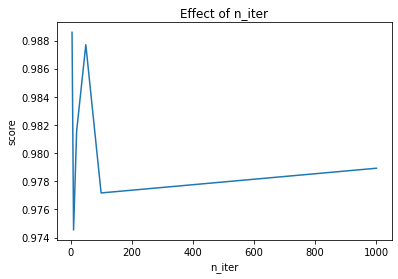

In [ ]:
import matplotlib.pyplot as plt
n_iters = [5, 10, 20, 50, 100, 1000]
scores = []
for n_iter in n_iters:
    clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=n_iter)
    clf.fit(xtrain, ytrain)
    scores.append(clf.score(xtest,ytest))
  
plt.title("Effect of n_iter")
plt.xlabel("n_iter")
plt.ylabel("score")
plt.plot(n_iters, scores)